# 80_ra271.352_dec-29.642_MAXIJ1803

In [4]:
from pathlib import Path
import numpy as np
import arviz as az
import graphviz as gv
import utility_functions as ufn
import importlib

importlib.reload(ufn)
az.style.use("arviz-white")

RANDOM_SEED = 2023-10-10
rng = np.random.default_rng(RANDOM_SEED)

OVERWRITE_TRACES = True

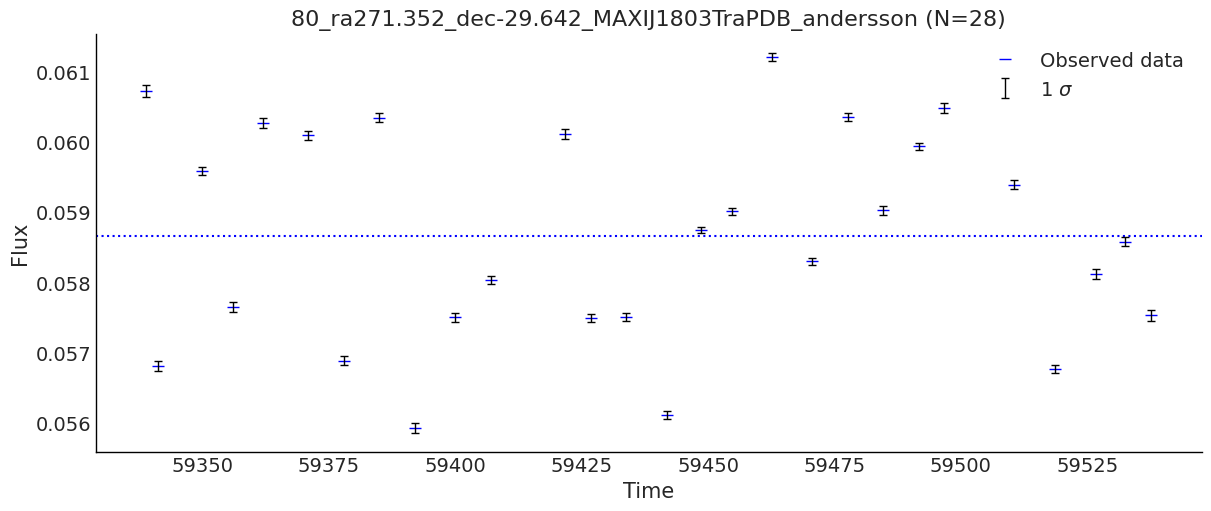

In [5]:
# File paths to CSVs of flux density observations.
csv_paths_list = sorted(list(Path('data_raw').iterdir()))
csv_path = csv_paths_list[3]
ufn.plot_lc(csv_path)

## SE Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN},i} \sim \textrm{HalfNormal}(e_i^2)$$

Sampling: [log_2ell_SE_sq, log_eta_SE, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_2ell_SE_sq, log_eta_SE, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 77 seconds.
Sampling: [f_star]


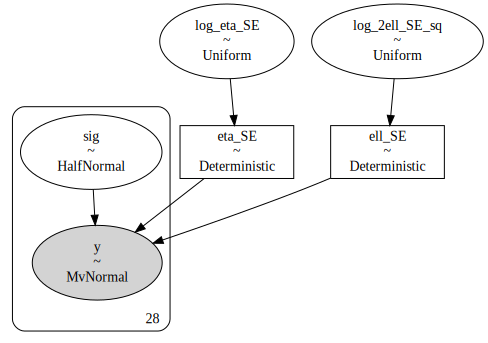

In [6]:
se_trace_path = Path(f"traces/{csv_path.stem}_se_idata.nc")
se_dag_path = Path(f'dags/{csv_path.stem}_se_dag.dot')

if se_trace_path.is_file() and not OVERWRITE_TRACES:
    se_trace = az.from_netcdf(se_trace_path)
    se_dag = gv.Source.from_file(se_dag_path)
else:
    se_trace, se_dag = ufn.fit_se_gp(csv_path, rng_seed=rng);
    az.to_netcdf(se_trace, se_trace_path)
    with open(se_dag_path, 'w') as writehandle:
        writehandle.write(se_dag.source)

gv.Source(se_dag.source)

In [7]:
variable_names = ["log_2ell_SE_sq", "log_eta_SE", "ell_SE", "eta_SE"]
ufn.print_post_summary(se_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_SE_sq   10.846232   0.249637   10.413276   11.142587     0.010494   
log_eta_SE       -3.112447   0.267481   -3.471768   -2.679764     0.007812   
ell_SE          160.219159  20.058814  129.032504  185.809137     0.840582   
eta_SE            0.044492   0.011397    0.031062    0.068579     0.000348   

                 ess_median     ess_tail     r_hat        mean         sd  
log_2ell_SE_sq  2768.722818  1631.569467  0.999784   10.779606   0.358431  
log_eta_SE      4232.046980  2355.519794  1.000404   -3.074710   0.402019  
ell_SE          2768.722818  1631.569467  0.999843  157.350404  26.240766  
eta_SE          4232.046980  2355.519794  1.000404    0.050485   0.025206

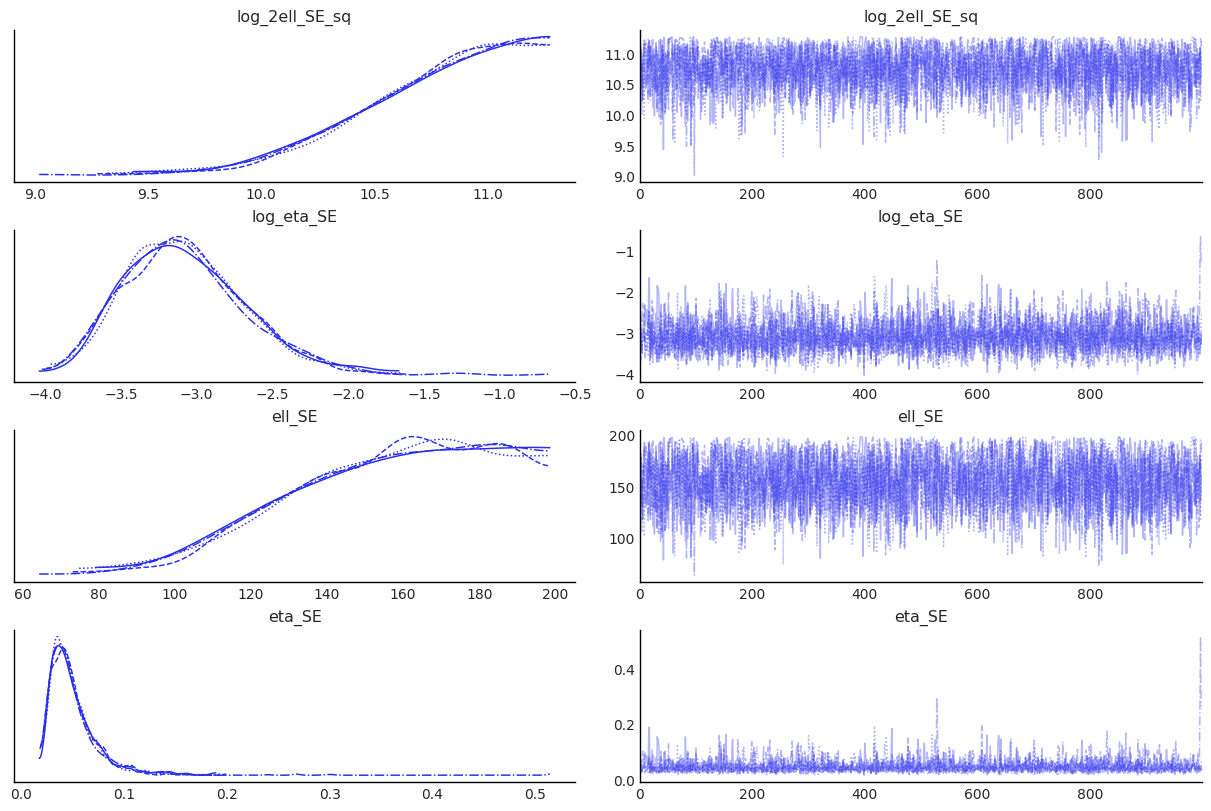

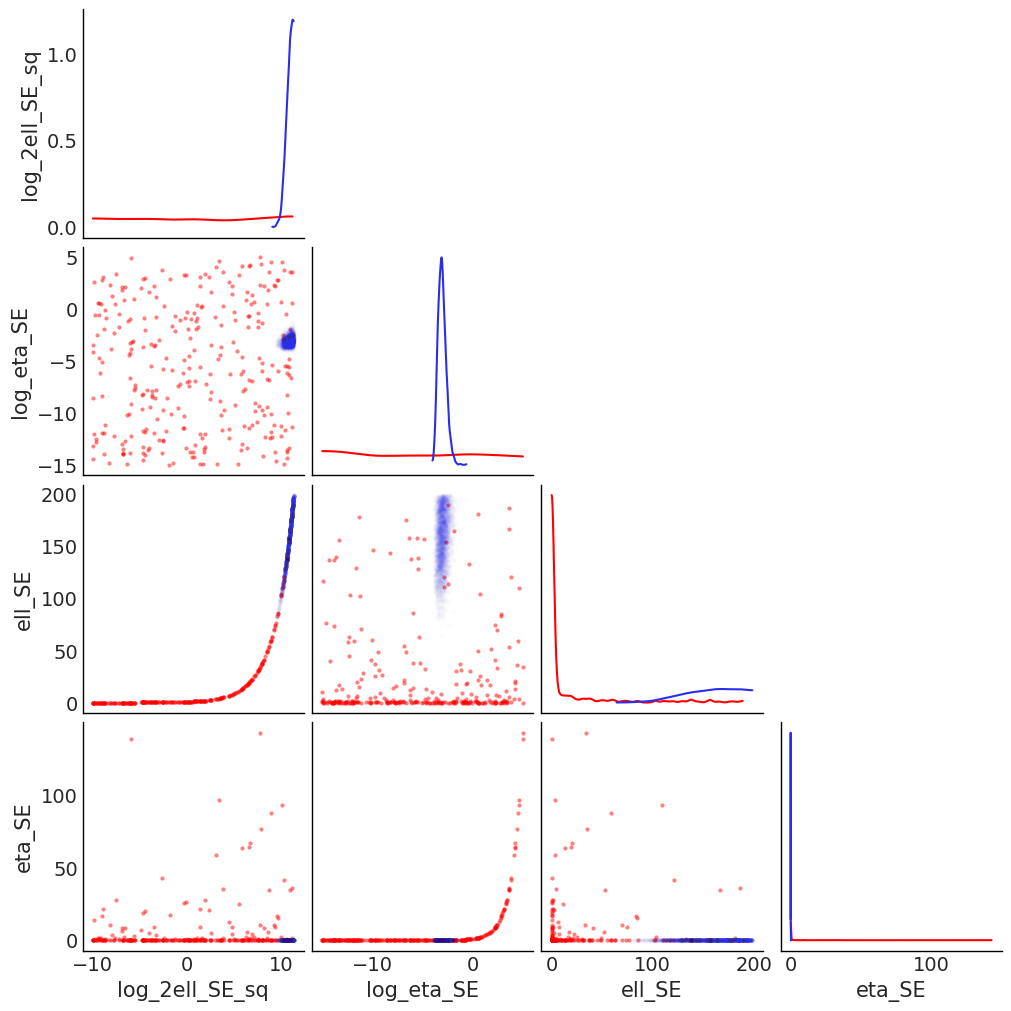

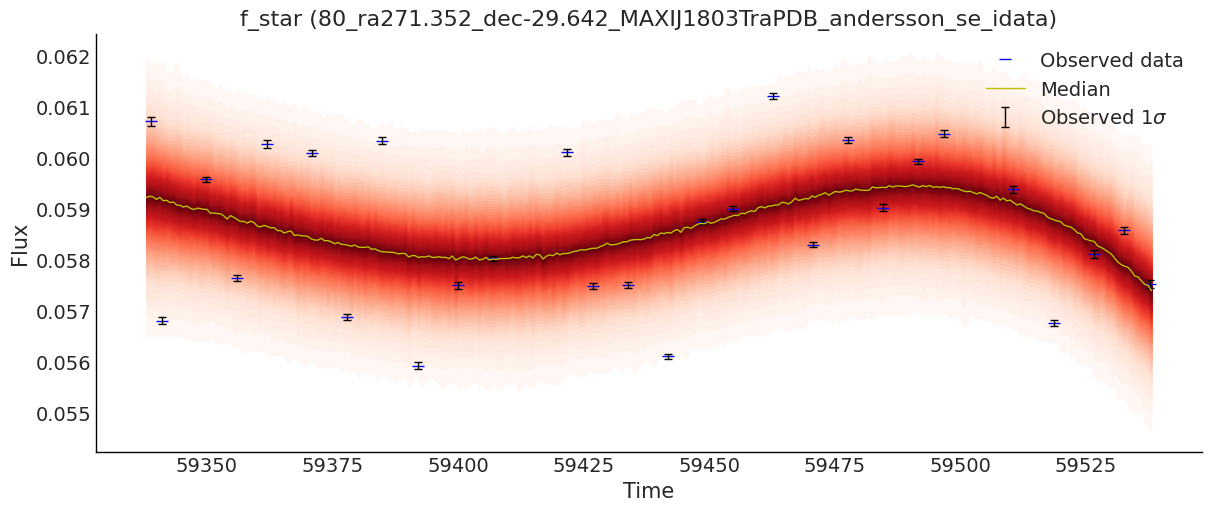

In [8]:
ufn.plot_traces(se_trace_path, variable_names)
ufn.plot_priorpost_cnr(se_trace_path, variable_names)
ufn.plot_postpred_samples(se_trace_path, csv_path)

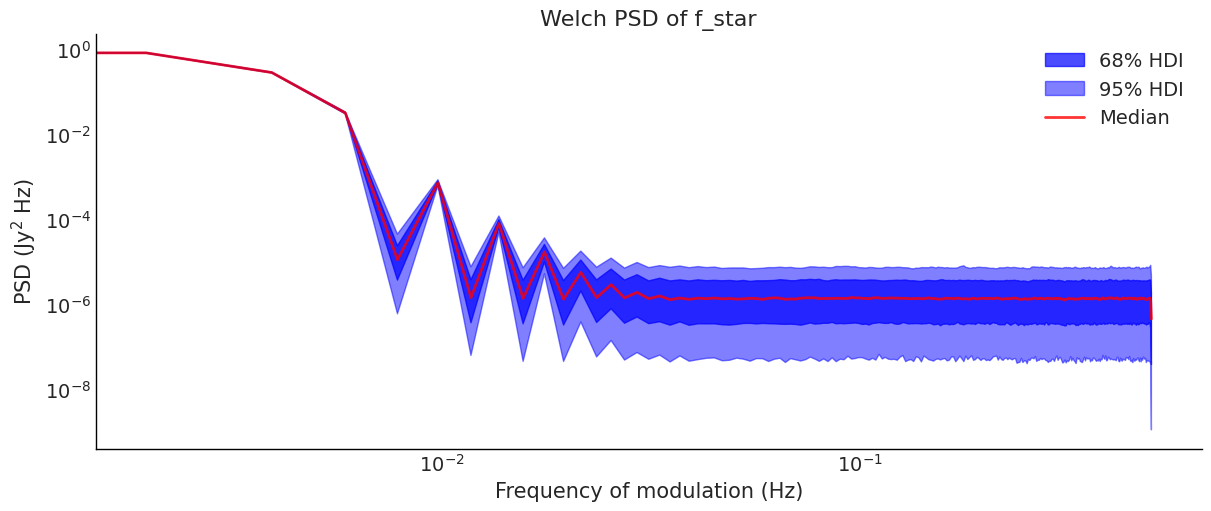

In [9]:
ufn.plot_welch_psd(se_trace);

## Matern $\frac{3}{2}$ Kernel only

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{M}(\tau) =  \eta_\textrm{M}^2\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

Sampling: [log_2ell_M32_sq, log_eta_M32, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_2ell_M32_sq, log_eta_M32, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 74 seconds.
Sampling: [f_star]


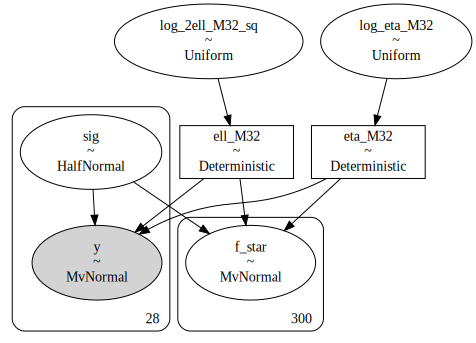

In [10]:
m32_trace_path = Path(f"traces/{csv_path.stem}_m32_idata.nc")
m32_dag_path = Path(f'dags/{csv_path.stem}_m32_dag.dot')

if m32_trace_path.is_file() and not OVERWRITE_TRACES:
    m32_trace = az.from_netcdf(m32_trace_path)
    m32_dag = gv.Source.from_file(m32_dag_path)
else:
    m32_trace, m32_dag = ufn.fit_m32_gp(csv_path, rng_seed=rng);
    az.to_netcdf(m32_trace, m32_trace_path)
    with open(m32_dag_path, 'w') as writehandle:
        writehandle.write(m32_dag.source)

gv.Source(m32_dag.source)

In [11]:
variable_names = ["log_2ell_M32_sq", "log_eta_M32", "ell_M32", "eta_M32"]
ufn.print_post_summary(m32_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_M32_sq   11.101075   0.122365   10.829965   11.233968     0.004895   
log_eta_M32       -3.553847   0.179934   -3.798364   -3.281751     0.004538   
ell_M32          181.992252  11.247835  158.921296  194.495783     0.445463   
eta_M32            0.028614   0.005061    0.022407    0.037562     0.000130   

                  ess_median     ess_tail     r_hat        mean         sd  
log_2ell_M32_sq  2941.021089  2004.381005  1.000338   11.033902   0.229860  
log_eta_M32      5233.323526  2156.841484  1.004147   -3.537804   0.262280  
ell_M32          2941.021089  2004.381005  1.000338  177.078814  18.667609  
eta_M32          5233.323526  2156.841484  1.004382    0.030132   0.008528

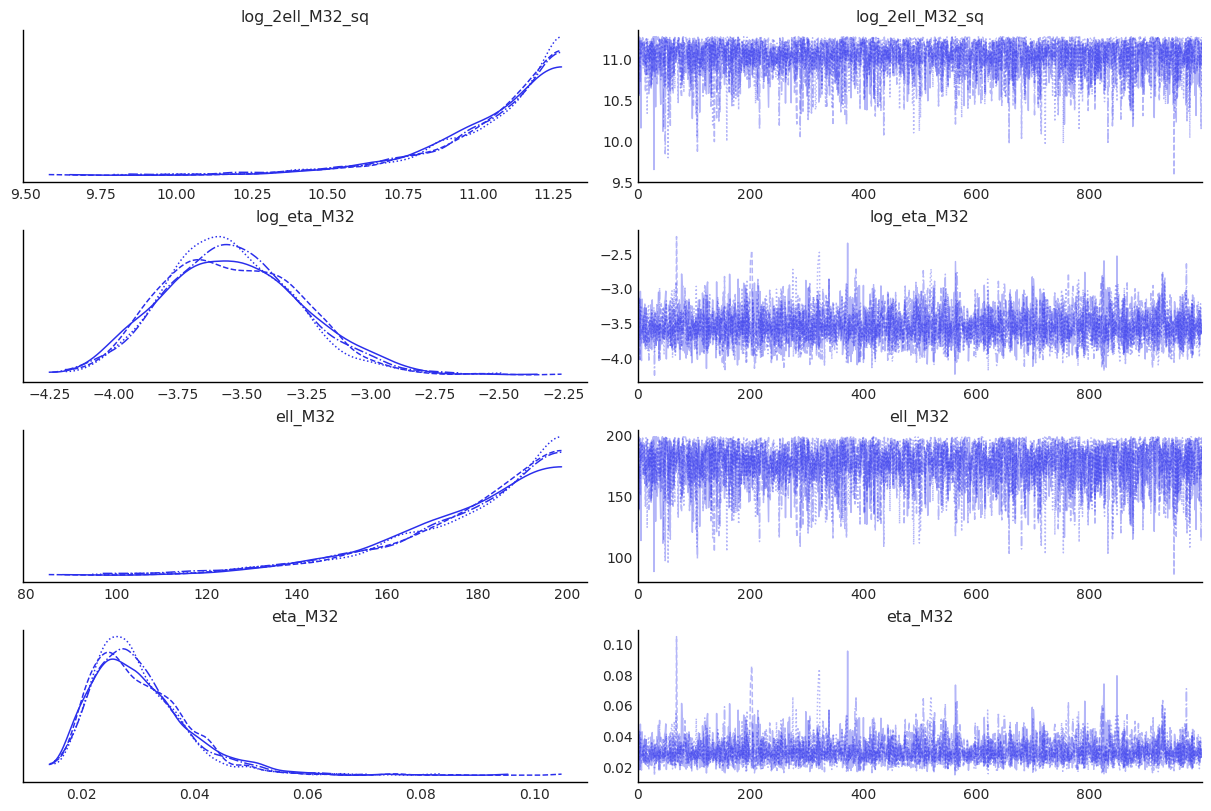

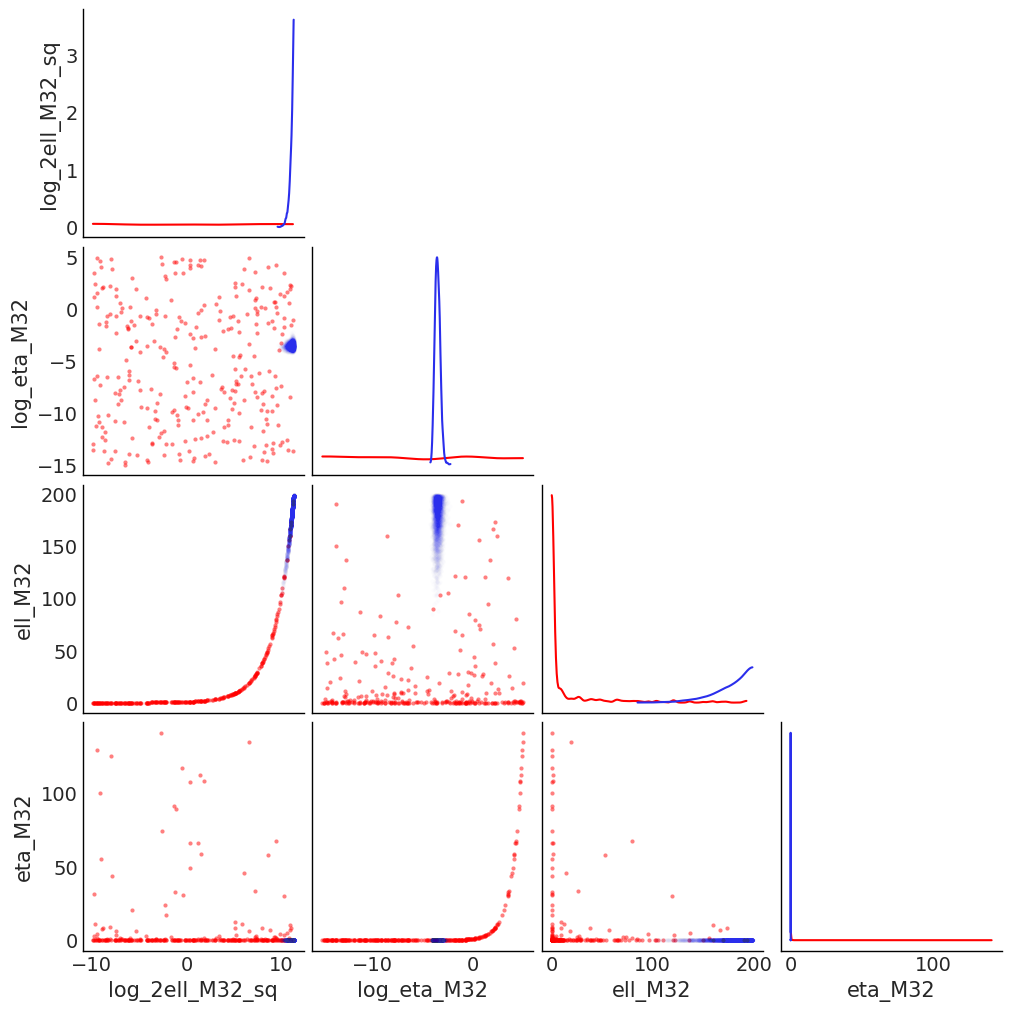

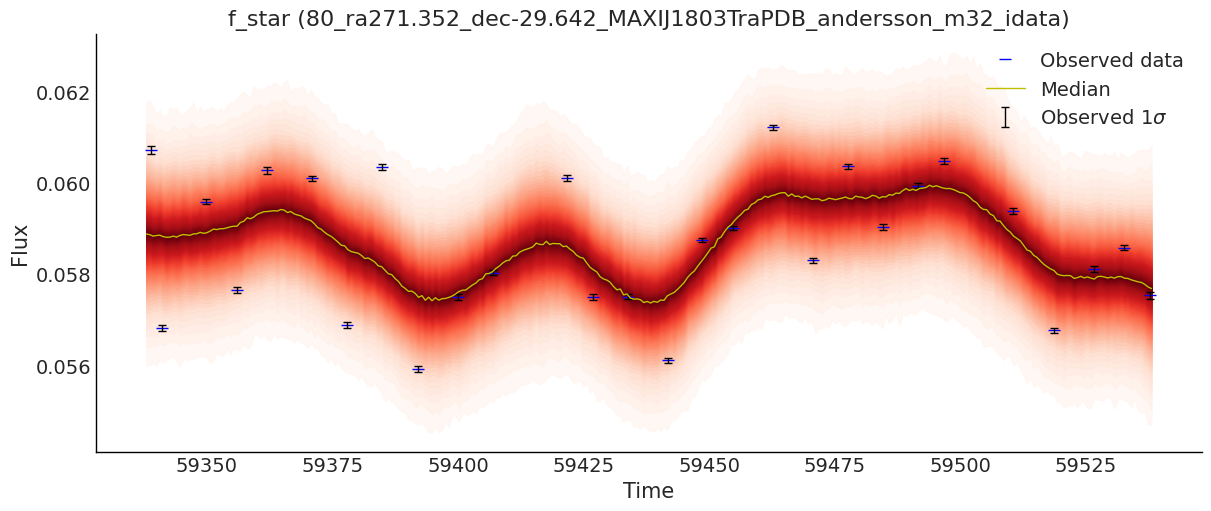

In [12]:
ufn.plot_traces(m32_trace_path, variable_names)
ufn.plot_priorpost_cnr(m32_trace_path, variable_names)
ufn.plot_postpred_samples(m32_trace_path, csv_path)

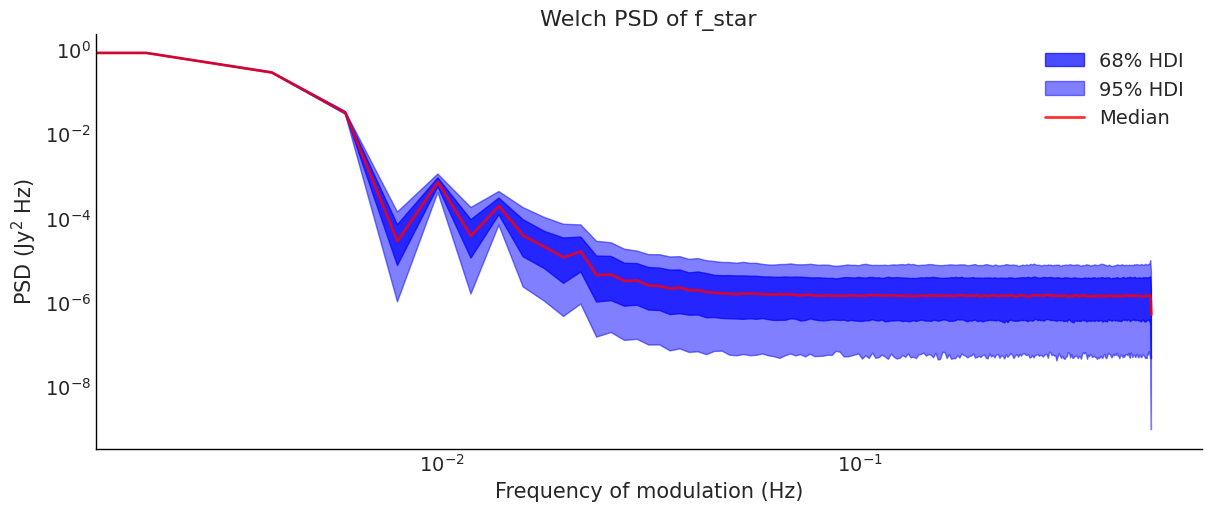

In [13]:
ufn.plot_welch_psd(m32_trace);

## SE + Matern $\frac{3}{2}$ additive kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\textrm{SE+M}(\tau))$$

$$k_\textrm{SE+M}(\tau) = \eta^2 \left[ \exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} + \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\} \right]$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

Sampling: [log_2ell_M_sq, log_2ell_SE_sq, log_eta, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_2ell_SE_sq, log_2ell_M_sq, log_eta, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 103 seconds.
Sampling: [f_star]


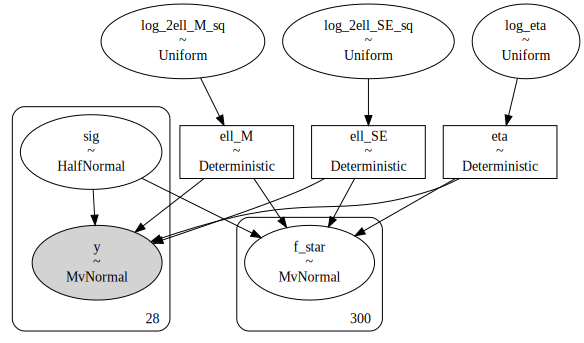

In [14]:
sem32_trace_path = Path(f"traces/{csv_path.stem}_se+m32_idata.nc")
sem32_dag_path = Path(f'dags/{csv_path.stem}_se+m32_dag.dot')

if sem32_trace_path.is_file() and not OVERWRITE_TRACES:
    sem32_trace = az.from_netcdf(sem32_trace_path)
    sem32_dag = gv.Source.from_file(sem32_dag_path)
else:
    sem32_trace, sem32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=False, rng_seed=rng);
    az.to_netcdf(sem32_trace, sem32_trace_path)
    with open(sem32_dag_path, 'w') as writehandle:
        writehandle.write(sem32_dag.source)

gv.Source(sem32_dag.source)

In [15]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta"]
ufn.print_post_summary(sem32_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.668266  0.381457   9.944310  11.114285     0.012875   
log_2ell_M_sq   11.028941  0.169218  10.655234  11.211882     0.005773   
log_eta         -3.834113  0.179455  -4.089521  -3.558511     0.005469   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  3231.553102  1762.051590  1.000997  10.552420  0.563832  
log_2ell_M_sq   3332.572507  2151.985602  1.000726  10.940747  0.307178  
log_eta         4216.775624  2505.443434  1.000547  -3.820331  0.273076

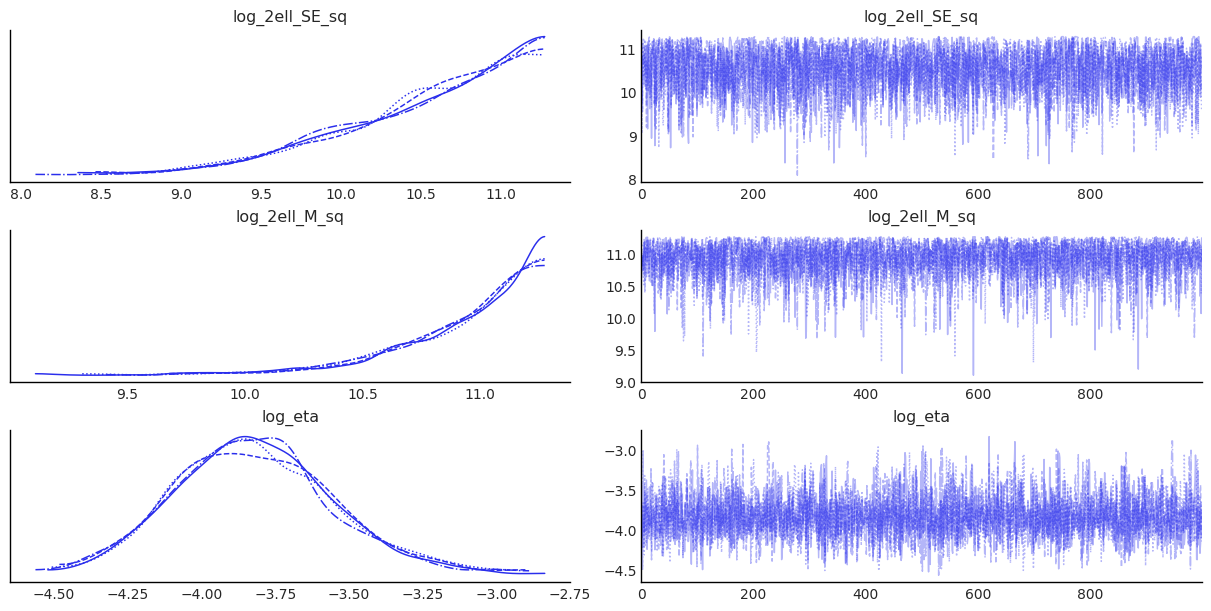

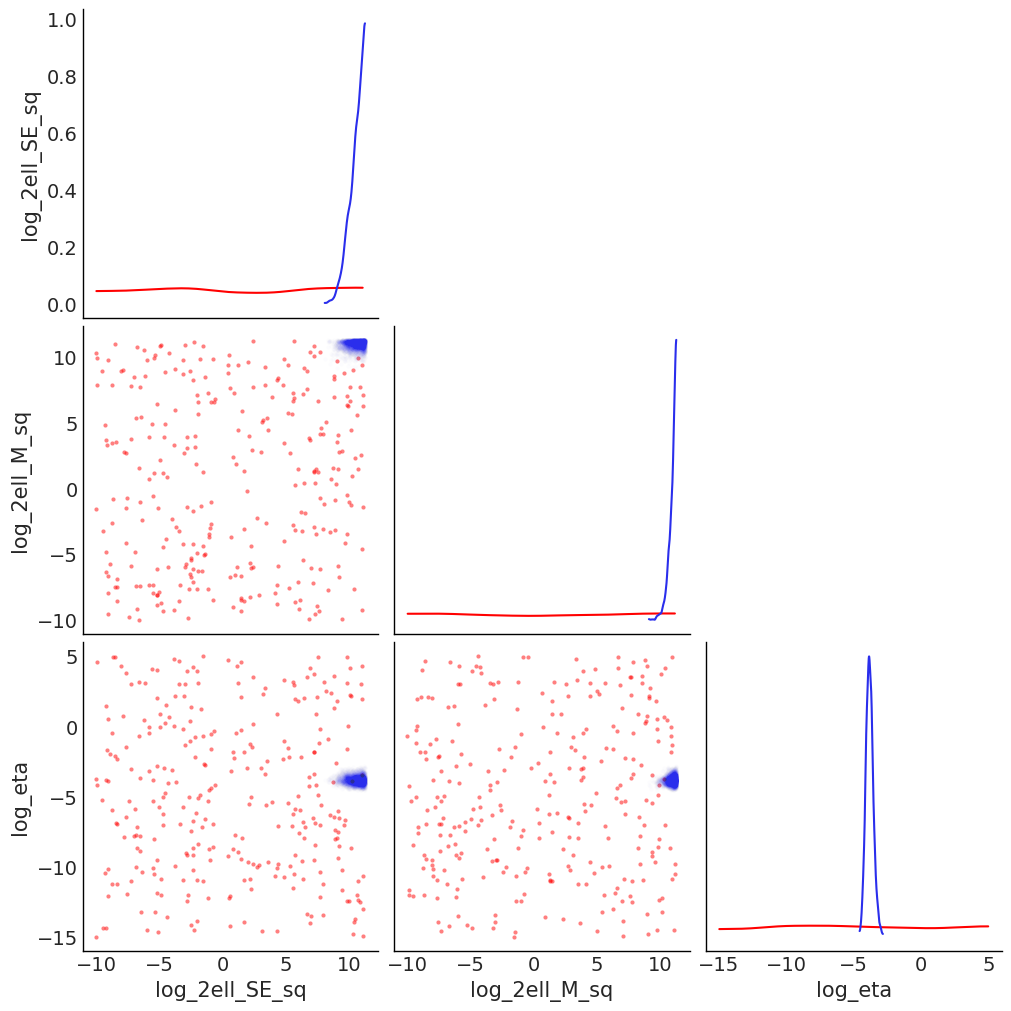

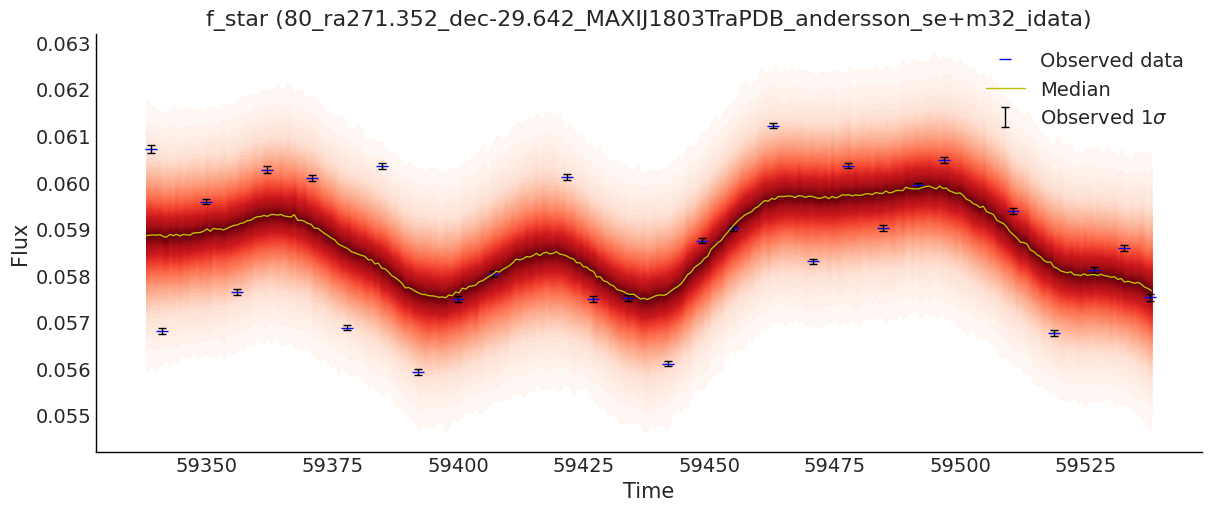

In [16]:
ufn.plot_traces(sem32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sem32_trace_path, variable_names)
ufn.plot_postpred_samples(sem32_trace_path, csv_path)

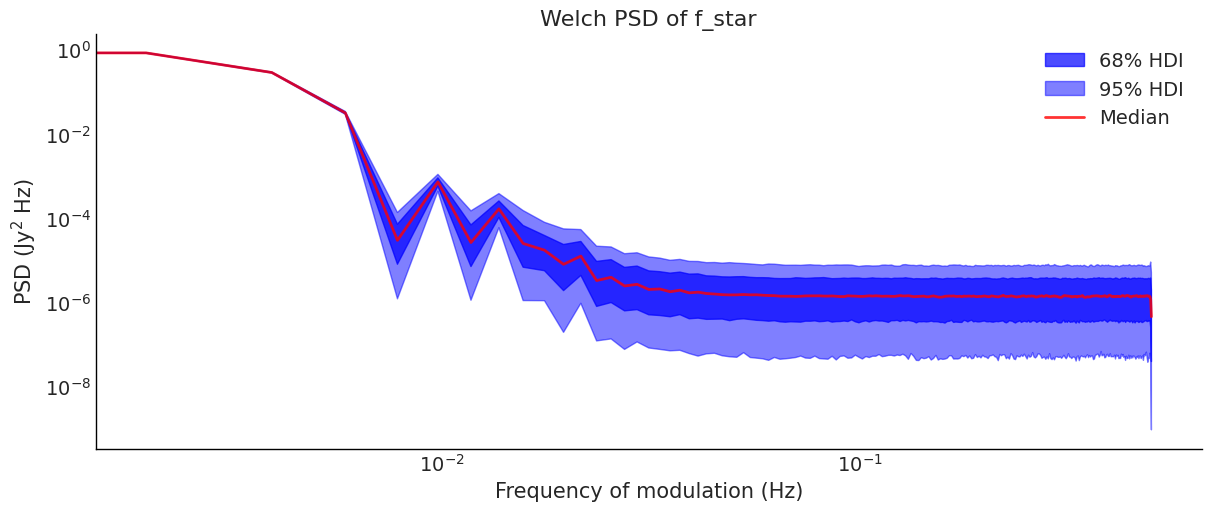

In [17]:
ufn.plot_welch_psd(sem32_trace);

## SE GP + Matern $\frac{3}{2}$ GP

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{GP}(\boldsymbol{0}, k_\textrm{SE}(\tau)) + \mathcal{GP}(\boldsymbol{0}, k_\textrm{M}(\tau))$$

$$k_\textrm{SE}(\tau) = \eta^2_\textrm{SE}\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\}, \quad k_\textrm{M}(\tau) = \eta^2_\textrm{M}\left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{SE} \sim \mathcal{U}[-15, 5]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta_\textrm{M} \sim \mathcal{U}[-15, 5]$$

$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

Sampling: [f, log_2ell_M32_sq, log_2ell_SE_sq, log_eta_M32, log_eta_SE, sig]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_2ell_SE_sq, log_eta_SE, log_2ell_M32_sq, log_eta_M32, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 147 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [f_star, f_star_M32, f_star_SE]


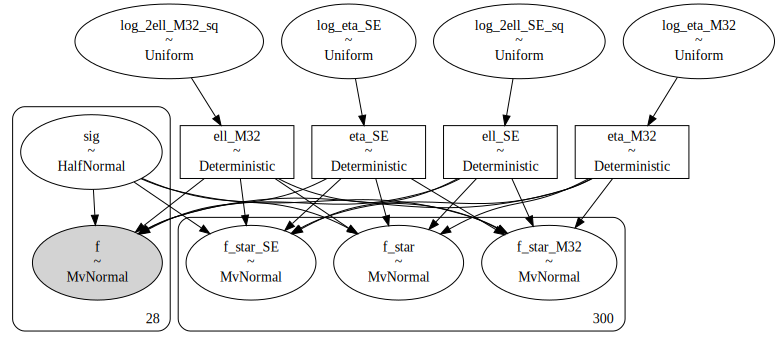

In [18]:
gpSE_gpM32_trace_path = Path(f"traces/{csv_path.stem}_gpSE_gpM32_idata.nc")
gpSE_gpM32_dag_path = Path(f'dags/{csv_path.stem}_gpSE_gpM32_dag.dot')

if gpSE_gpM32_trace_path.is_file() and not OVERWRITE_TRACES:
    gpSE_gpM32_trace = az.from_netcdf(gpSE_gpM32_trace_path)
    gpSE_gpM32_dag = gv.Source.from_file(gpSE_gpM32_dag_path)
else:
    gpSE_gpM32_trace, gpSE_gpM32_dag = ufn.fit_gpSE_gpM32(csv_path, rng_seed=rng);
    az.to_netcdf(gpSE_gpM32_trace, gpSE_gpM32_trace_path)
    with open(gpSE_gpM32_dag_path, 'w') as writehandle:
        writehandle.write(gpSE_gpM32_dag.source)

gv.Source(gpSE_gpM32_dag.source)

In [19]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M32_sq", "log_eta_SE", "log_eta_M32", "ell_SE", "ell_M32"]
ufn.print_post_summary(gpSE_gpM32_trace_path, variable_names)

median        mad     eti_16%     eti_84%  mcse_median  \
log_2ell_SE_sq    10.899665   0.241611   10.453976   11.181772     0.020293   
log_2ell_M32_sq   -3.374647   3.418601   -7.975659    1.691832     0.238211   
log_eta_SE        -3.111995   0.261924   -3.463350   -2.692238     0.017392   
log_eta_M32       -6.977238   0.280980   -7.747238   -6.644448     0.010816   
ell_SE           164.557308  20.107585  131.685221  189.485523     1.671992   
ell_M32            0.130825   0.122352    0.013110    1.647639     0.015752   

                  ess_median    ess_tail     r_hat        mean         sd  
log_2ell_SE_sq    537.817716  395.416962  1.010960   10.823230   0.366934  
log_2ell_M32_sq   669.871026  453.498004  1.001852   -2.933722   4.631786  
log_eta_SE        594.109747  215.133109  1.011794   -3.066370   0.427533  
log_eta_M32      1927.163479  466.762280  1.007115   -7.498182   1.633669  
ell_SE            537.817716  395.416962  1.010960  160.902208  26.930296  
ell_M32           669.871026  453.498004  1.001563    3.901920  19.106787

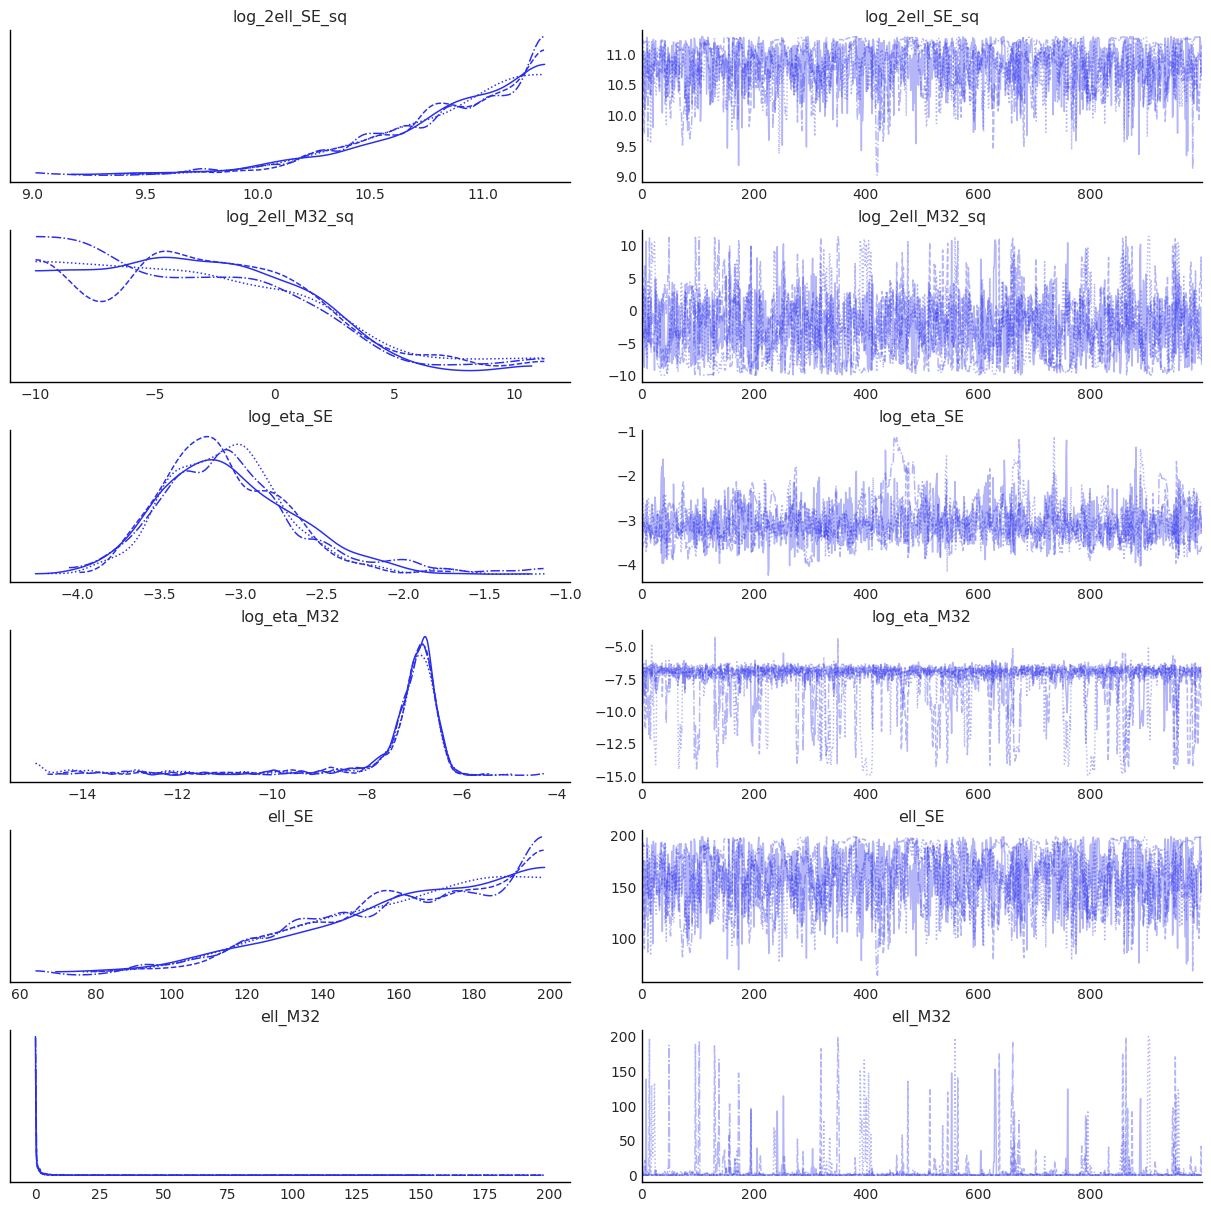

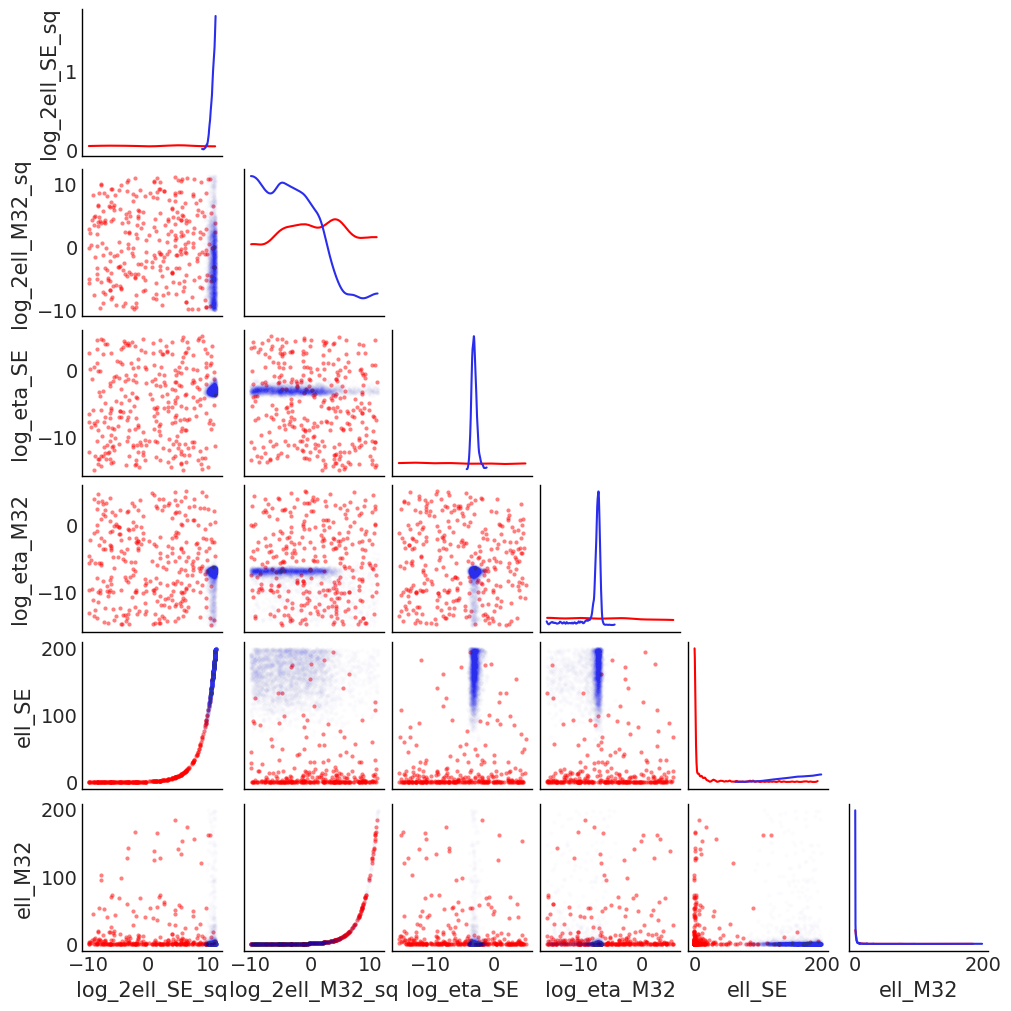

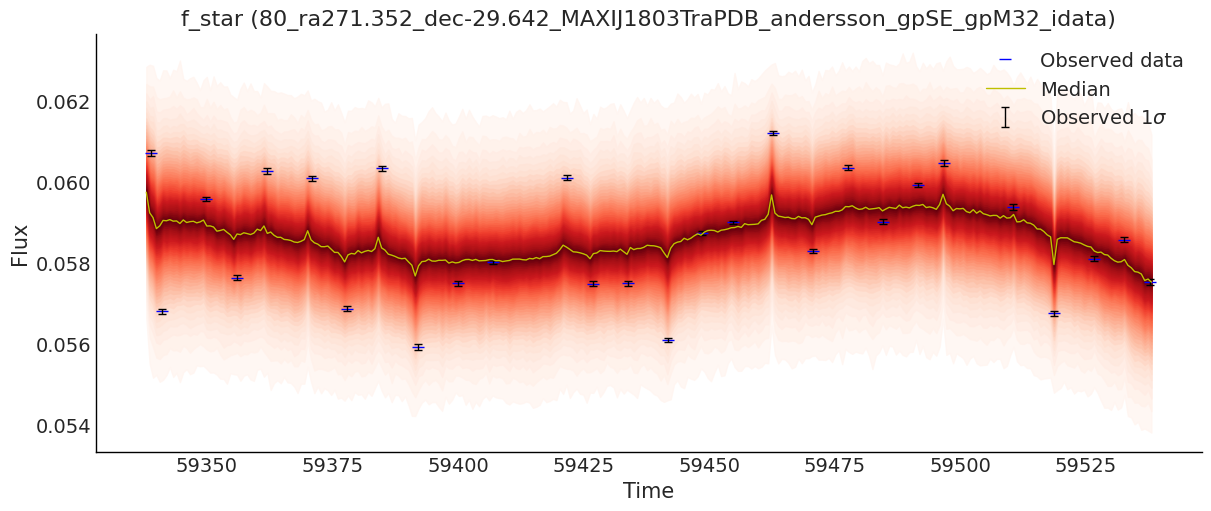

In [20]:
ufn.plot_traces(gpSE_gpM32_trace_path, variable_names)
ufn.plot_priorpost_cnr(gpSE_gpM32_trace_path, variable_names)
ufn.plot_postpred_samples(gpSE_gpM32_trace_path, csv_path)

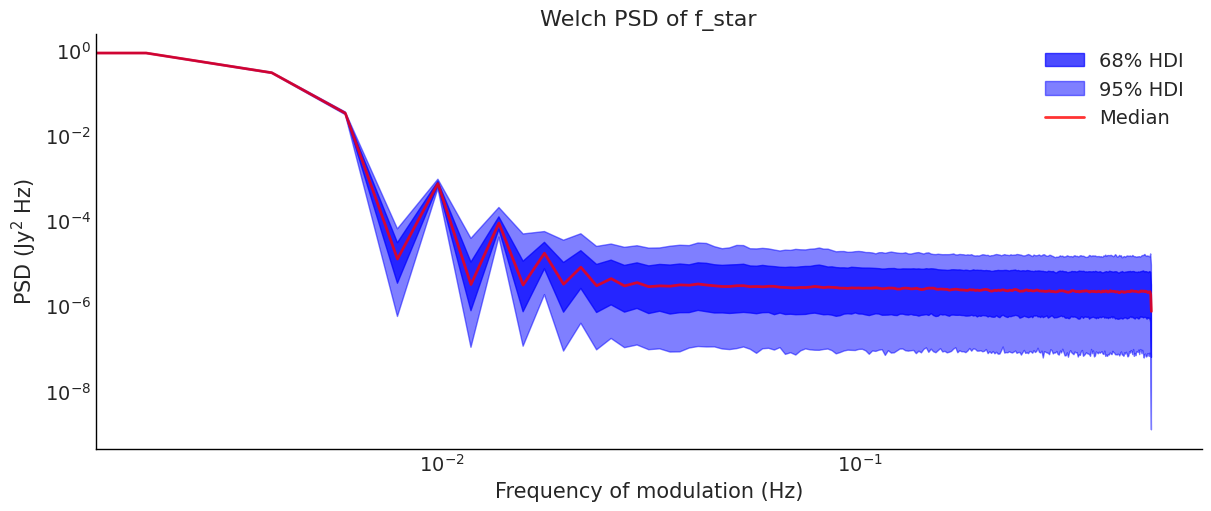

In [21]:
ufn.plot_welch_psd(gpSE_gpM32_trace);

## SE $\times$ Matern $\frac{3}{2}$ Multiplicative Kernel

$$Y \sim \mathcal{N}(f(t), \sigma_\textrm{WN}^2)$$

$$f(t) \sim \mathcal{MVN}(\boldsymbol{0}, k_\mathrm{SE \times M}(\tau))$$

$$k_\mathrm{SE \times M}(\tau) = \eta^2\exp\left\{ - \frac{1}{2\ell_\textrm{SE}^2}\tau^2\right\} \left(1 + \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}}\right) \exp\left\{ - \frac{\sqrt{3\tau^2}}{\ell_\textrm{M}} \right\}$$

$$\log 2\ell^2_\textrm{SE} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log 2\ell^2_\textrm{M} \sim \mathcal{U}[-10, \log(2 \times (\textrm{t range})^2)]$$

$$\log \eta \sim \mathcal{U}[-15, 5]$$


$$\sigma_{\textrm{WN,i}} \sim \textrm{HalfNormal}(e_i^2)$$

Sampling: [log_2ell_M_sq, log_2ell_SE_sq, log_eta, sig, y]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_2ell_SE_sq, log_2ell_M_sq, log_eta, sig]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 103 seconds.
Sampling: [f_star]


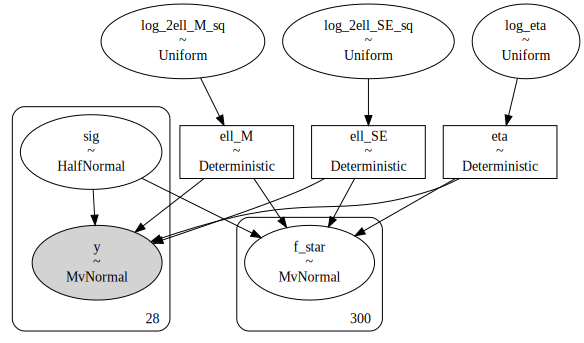

In [22]:
sexm32_trace_path = Path(f"traces/{csv_path.stem}_sexm32_idata.nc")
sexm32_dag_path = Path(f'dags/{csv_path.stem}_sexm32_dag.dot')

if sexm32_trace_path.is_file() and not OVERWRITE_TRACES:
    sexm32_trace = az.from_netcdf(sexm32_trace_path)
    sexm32_dag = gv.Source.from_file(sexm32_dag_path)
else:
    sexm32_trace, sexm32_dag = ufn.fit_sem32_gp(csv_path, multiplicative_kernel=True, rng_seed=rng);
    az.to_netcdf(sexm32_trace, sexm32_trace_path)
    with open(sexm32_dag_path, 'w') as writehandle:
        writehandle.write(sexm32_dag.source)

gv.Source(sexm32_dag.source)

In [23]:
variable_names = ["log_2ell_SE_sq", "log_2ell_M_sq", "log_eta"]
ufn.print_post_summary(sexm32_trace_path, variable_names)

median       mad    eti_16%    eti_84%  mcse_median  \
log_2ell_SE_sq  10.810598  0.298148  10.246544  11.159685     0.010692   
log_2ell_M_sq   11.060146  0.146433  10.753039  11.225440     0.003653   
log_eta         -3.480749  0.169454  -3.721621  -3.220061     0.004586   

                 ess_median     ess_tail     r_hat       mean        sd  
log_2ell_SE_sq  3197.874459  1624.506158  1.000045  10.701478  0.466961  
log_2ell_M_sq   3797.501317  1727.402311  1.000511  10.991194  0.257384  
log_eta         4868.010774  2813.040430  1.000581  -3.467891  0.251751

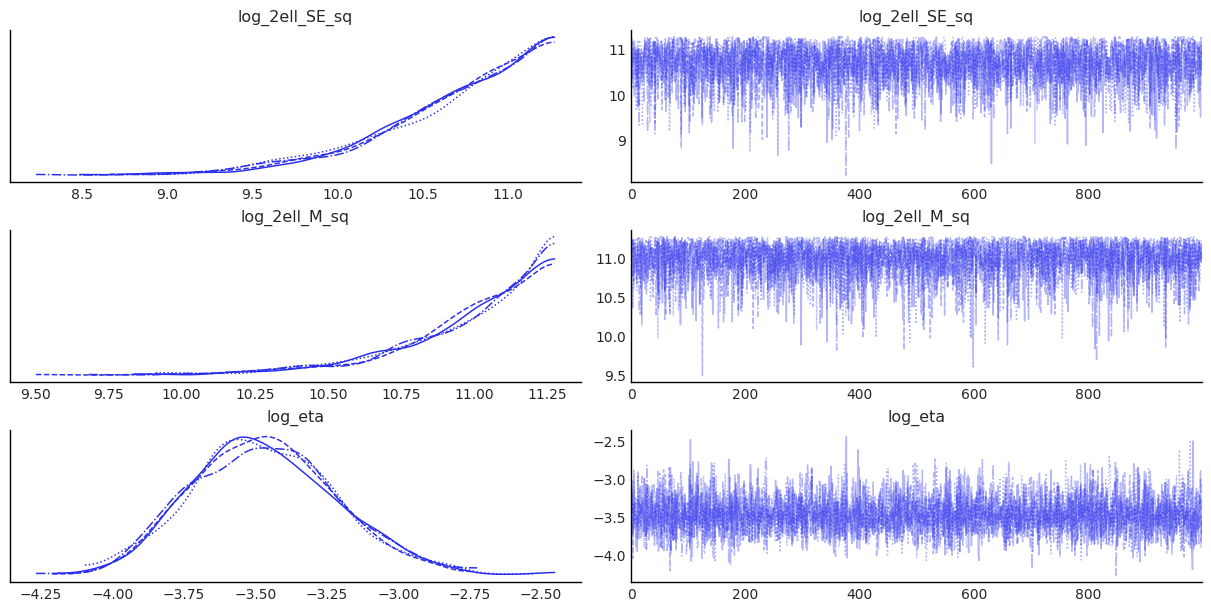

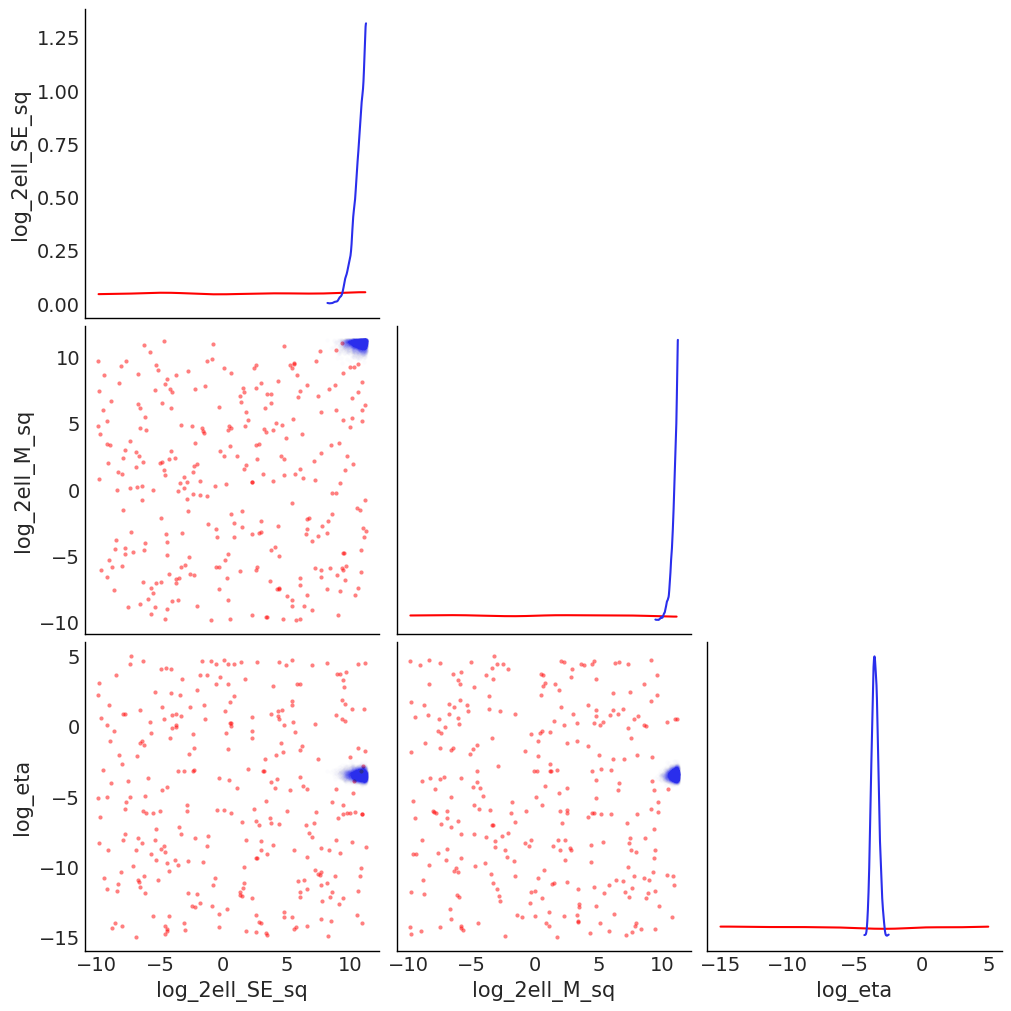

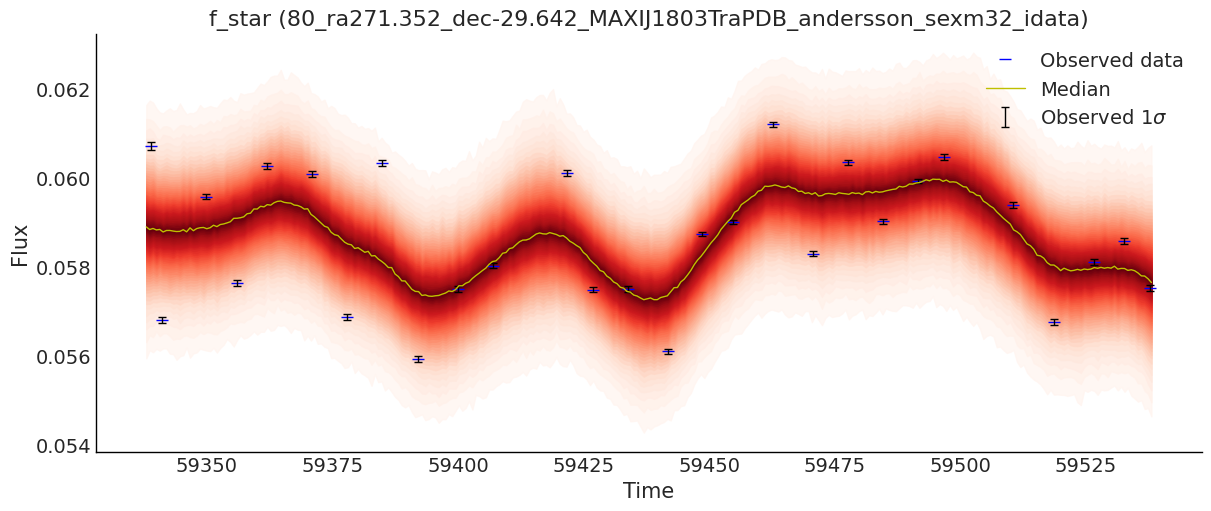

In [24]:
ufn.plot_traces(sexm32_trace_path, variable_names)
ufn.plot_priorpost_cnr(sexm32_trace_path, variable_names)
ufn.plot_postpred_samples(sexm32_trace_path, csv_path)

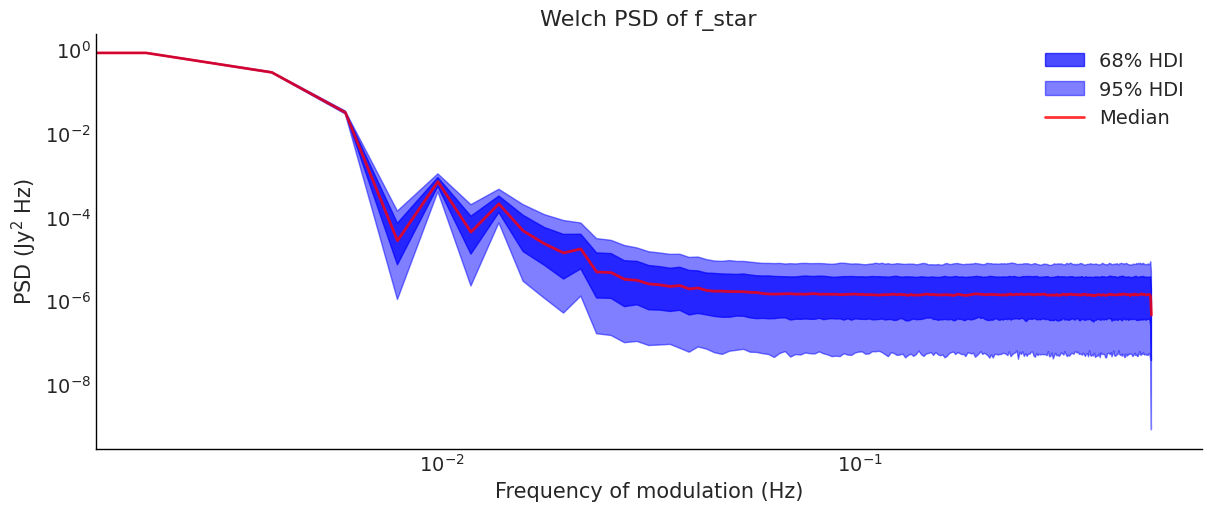

In [25]:
ufn.plot_welch_psd(sexm32_trace);